In [61]:
#importing libraries
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
#reading csv file
boston_dataset = pd.read_csv("boston.csv")

In [63]:
#loading data in pandas dataframe
X = pd.DataFrame(boston_dataset[['rm','ptratio','black','lstat']], columns =['rm','ptratio','black','lstat'])
Y = boston_dataset['medv']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)  #splitting data into train and test set
trindex=list(X_train.index)
teindex=list(X_test.index)

#converting into array
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test1=X_test

In [65]:
#printing shape of array
print("\nshape of X_train is: ",X_train.shape)
print("shape of Y_train is: ",Y_train.shape)
print("shape of X_test is: ",X_test.shape)
print("shape of Y_test is: ",Y_test.shape)


shape of X_train is:  (392, 4)
shape of Y_train is:  (392,)
shape of X_test is:  (98, 4)
shape of Y_test is:  (98,)


In [66]:
#creating object of StandardScaler for standardization
scaler=StandardScaler() 

#fitting into X_train
scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
dummy=(np.ones([392,1],dtype=int)) 

# concatenating 1's for intercept calculation
X_train=np.concatenate((dummy,X_train),axis=1) 

dummy_test=(np.ones([98,1],dtype=int))

# concatenating 1's for intercept calculation
X_test=np.concatenate((dummy_test,X_test),axis=1)

In [69]:
print("\n1. Stochastic Gradient Descent")
print("2. Batch Gradient Descent")
print("3. Mini-Batch Gradient Descent")

ch=eval(input("\nEnter your choice "))
epochs=350


1. Stochastic Gradient Descent
2. Batch Gradient Descent
3. Mini-Batch Gradient Descent

Enter your choice 3


In [70]:
#Mean-Squared-Error loss
def calculate_error(theta):
    error=0
    for i in range(Y_train.shape[0]):
        error+=np.square(np.dot(theta.transpose(),X_train[i])-Y_train[i])
    mse=error/(2*Y_train.shape[0])
    return mse

In [71]:
#array with random values of coefficients
theta=np.random.rand(5,1) 

# array for storing updated value of theta
temp=np.ndarray([5,1]) 

#learning rate
alpha=0.0086 

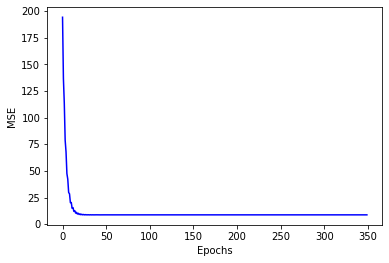

initial value of mean square error was:  [194.12471203]
reduced value of mean square error is:  [8.77248557]


In [72]:
#gradient descent calculation
if ch==1:
    y=[]
    for epoch in range(epochs):
        for j in range(5):
            dif=0
            for i in range(Y_train.shape[0]):
                dif+=(np.dot(theta.transpose(),X_train[i].reshape([5,1])) - Y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/392)*(dif)
            theta=temp   
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
if ch==2:
    y=[]
    for epoch in range(epochs):
        for j in range(5):
            dif=0
            for i in range(Y_train.shape[0]):
                dif+=(np.dot(theta.transpose(),X_train[i].reshape([5,1])) - Y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/392)*(dif)
        theta=temp
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
if ch==3:
    y=[]
    batch_size=10
    batches=Y_train.shape[0]//batch_size
    for epoch in range(epochs):
        for j in range(5):
            dif=0
            for batch in range(batches):
                for i in range(batch*batch_size,batch*batch_size+batch_size):
                    dif+=(np.dot(theta.transpose(),X_train[i].reshape([5,1])) - Y_train[i])*X_train[i][j]
                temp[j] = theta[j] - (alpha/batch_size)*(dif)
                theta=temp    
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
print("initial value of mean square error was: ",y[0])
print("reduced value of mean square error is: ",y[(len(y)-1)])

In [73]:
#calculation of average percentage error in predicted price for train set
per=[]
for i in range(Y_train.shape[0]):
    temp=((np.abs((np.dot(theta.T,X_train[i].reshape(5,1)))-(Y_train[i])))/(Y_train[i]))*100
    per.append(temp)
avgp=sum(per)/len(per)
print("average percentage error in price prediction of train set is: {}% ".format(avgp[0][0]))

average percentage error in price prediction of train set is: 17.103694151816274% 


In [74]:
#calculation of average percentage error in predicted price for test set
per1=[]
for i in range(Y_test.shape[0]):
    temp=((np.abs((np.dot(theta.T,X_test[i].reshape(5,1)))-(Y_test[i])))/(Y_test[i]))*100
    per1.append(temp)
avgp1=sum(per1)/len(per1)
print("average percentage error in price prediction of test set is: {}% ".format(avgp1[0][0]))

average percentage error in price prediction of test set is: 16.437665748561386% 


In [75]:
#calculation of R2 and root mean square error for checking performance of train set
lis=[]
for i in range(Y_train.shape[0]):
    temp=np.sum(np.dot(theta.T,X_train[i].reshape(5,1)))
    lis.append(temp)
Y_train_pred=np.array(lis)

In [76]:
r=r2_score(Y_train,Y_train_pred)
print("value of R2 for train set is: ",r)
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_pred)))
print("RMSE value is: ",rmse)

value of R2 for train set is:  0.70819663967519
RMSE value is:  4.188671762390509


In [77]:
#calculation of R2 and root mean square error for checking performance of test set
lis1=[]
for i in range(Y_test.shape[0]):
    temp=np.sum(np.dot(theta.T,X_test[i].reshape(5,1)))
    lis1.append(temp)
Y_test_pred=np.array(lis1)

In [78]:
r1=r2_score(Y_test,Y_test_pred)
print("value of R2 for test set is : ",r1)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_pred)))
print("value of rmse for test set is : ",rmse)

value of R2 for test set is :  0.7562994151482868
value of rmse for test set is :  4.07441227344886


In [79]:
import cv2
img1 = cv2.imread('gallery.jpg',1)
img2 = cv2.imread('hou2.jpg',1)
img3 = cv2.imread('hou1.jog.jpg',1)


In [80]:
#Predicting prices
flag=0
temp=X_test1[0:50]
df=pd.DataFrame(temp,columns=['rm','ptratio','black','lstat'])
print(df)

ind=int(input("\nenter the index no from above data for which you want to predict price: "))
price=np.dot(theta.transpose(),X_test[ind].reshape(5,1))
if(ind<20):
    flag=1
elif(ind>=20 and ind<=35):
    flag=2
else:
    flag=3
print("\nPREDICTED PRICE OF HOUSE IS: ",price[0][0])
print("ORIGINAL PRICE OF HOUSE IS : ",Y_test[ind])
print("\nimage of your house is as below")

    
if(flag==1):
    cv2.imshow('image1',img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
elif(flag==2):
    cv2.imshow('image2',img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
elif(flag==3):
    cv2.imshow('image3',img3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

       rm  ptratio   black  lstat
0   5.605     19.1  389.13  18.46
1   5.976     20.2   10.48  19.01
2   6.286     18.7  383.23   8.94
3   6.481     16.6  379.41   6.36
4   5.362     20.2  380.79  10.19
5   6.398     20.2  374.56   7.79
6   5.036     20.2  396.90  25.68
7   6.728     20.2    6.68  18.71
8   7.024     18.3  395.62   1.98
9   7.163     17.4  372.08   6.36
10  6.383     17.3  396.90   5.77
11  6.490     19.7  396.90   5.98
12  7.416     18.0  396.90   6.19
13  6.461     20.2   27.49  18.05
14  6.739     15.2  389.71   4.69
15  6.021     17.8  394.51  10.30
16  7.107     12.6  354.31   8.61
17  5.597     14.7  351.85  21.45
18  6.108     19.1  390.18   9.16
19  6.487     19.1  396.28   5.90
20  6.122     14.7  372.80  14.10
21  6.630     19.2  396.90   4.70
22  5.856     19.1  370.31  25.41
23  6.229     20.2  383.32  13.11
24  5.961     19.2  376.94   9.88
25  6.326     18.6  394.87  10.97
26  5.747     20.2  393.10  19.92
27  7.313     20.2  396.90  13.44
28  5.390     